<a href="https://colab.research.google.com/github/EneasDavid/Ciencia_de_dados/blob/main/1_Lista_de_Ciencia_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Autor:** David Enéas

**Materia:** Ciência de dados

**Período:** 2024.1

## Aquisição de Dados e Leitura
1.Escreva um script em Python que leia um arquivo CSV contendo dados de
vendas de uma empresa. **O arquivo deve conter as seguintes colunas: Data,
Produto, Quantidade, Preço**. Utilize a *biblioteca pandas* para ler o arquivo e
**exibir as primeiras 5 linhas do DataFrame resultante.**


In [ ]:
%pip install numpy
%pip install pandas
%pip install seaborn
%pip install scikit-learn

In [ ]:
## pandas para analise de dados
import pandas as pd

df = pd.read_csv("sales_data.csv")
## comadno head mostra as linhas iniciais de um arquivo,
## sendo por padrão apenas cinco, porem pode-se expecificar
## head(qtn de linhas)
df.head()


,Data,Produto,Quantidade,Preço
0,NaN,Hyper Disco Ultra,41.0,1282.09
1,NaN,Power Processador Max,NaN,1459.91
2,2024-01-19 05:39:08,Hyper Placa de Vídeo Pro,7.0,271.15
3,2023-08-02 02:35:30,Power Fonte Ultra,25.0,1075.75
4,2024-01-25 01:40:29,Mega Placa X200,NaN,791.23


## Pré-processamento de Dados
**Limpe os dados lidos no exercício anterior** removendo *linhas com valores nulos e convertendo a coluna Data para o tipo datetime*. Em seguida, *normalize a coluna Quantidade para que os valores estejam entre 0 e 1*.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

df_normalizado=df.copy()

## remove qualquer linha com valor nullo
##o () do dropna serve para expecificar o que ele deve remover
df_normalizado=df_normalizado.dropna()

## deve ser interpretado como um array
##to_TIPO altera o tipo do dado
df_normalizado['Data']=pd.to_datetime(df_normalizado['Data'])

# Inicializar o escalador
##por padrão ele pega o intervalor (0,1), porem par expecificar algum basta
## usar (intervaloInicial,intervaloFinal), preservando os parenteses
scaler = MinMaxScaler()

# Reshape a coluna para o formato esperado pelo MinMaxScaler
df_normalizado['Quantidade'] = scaler.fit_transform(df_normalizado[['Quantidade']])


df_normalizado.head()

,Data,Produto,Quantidade,Preço
2,2024-01-19 05:39:08,Hyper Placa de Vídeo Pro,0.122449,271.15
3,2023-08-02 02:35:30,Power Fonte Ultra,0.489796,1075.75
6,2023-02-19 05:33:03,Turbo Placa Plus,0.224490,1240.29
7,2024-01-13 00:30:18,Super Fonte Pro,0.653061,1067.46
9,2024-06-20 07:36:59,Mega Disco Ultra,0.693878,399.67


# #Análise Estatística
Calcule a **média, mediana, desvio padrão e moda** para a coluna *Preço* do DataFrame resultante do pré-processamento.


In [ ]:
## mean() calcula a media
media=df_normalizado['Preço'].mean()

## median() calcula a mediana
mediana=df_normalizado['Preço'].median()

## std() calcula o desvio padrão
desvio_padrao=df_normalizado['Preço'].std()

## mode() calcula a moda
## moda retorna uma serie, podemos usar o tolist() para ajudar no print
moda=df_normalizado['Preço'].mode()

print(f"Média: {media}\nMediana: {mediana}\nDesvio Padrão: {desvio_padrao}\nModa: {moda.tolist()}")

Média: 999.5622772277227
Mediana: 972.355
Desvio Padrão: 589.1981174239127
Moda: [1766.57]


## Visualização de Dados
Crie um *gráfico de barras* utilizando a biblioteca **matplotlib** ou **seaborn** que *mostre a quantidade total vendida de cada produto*. *O eixo x deve representar os produtos* e *o eixo y a quantidade total vendida*.

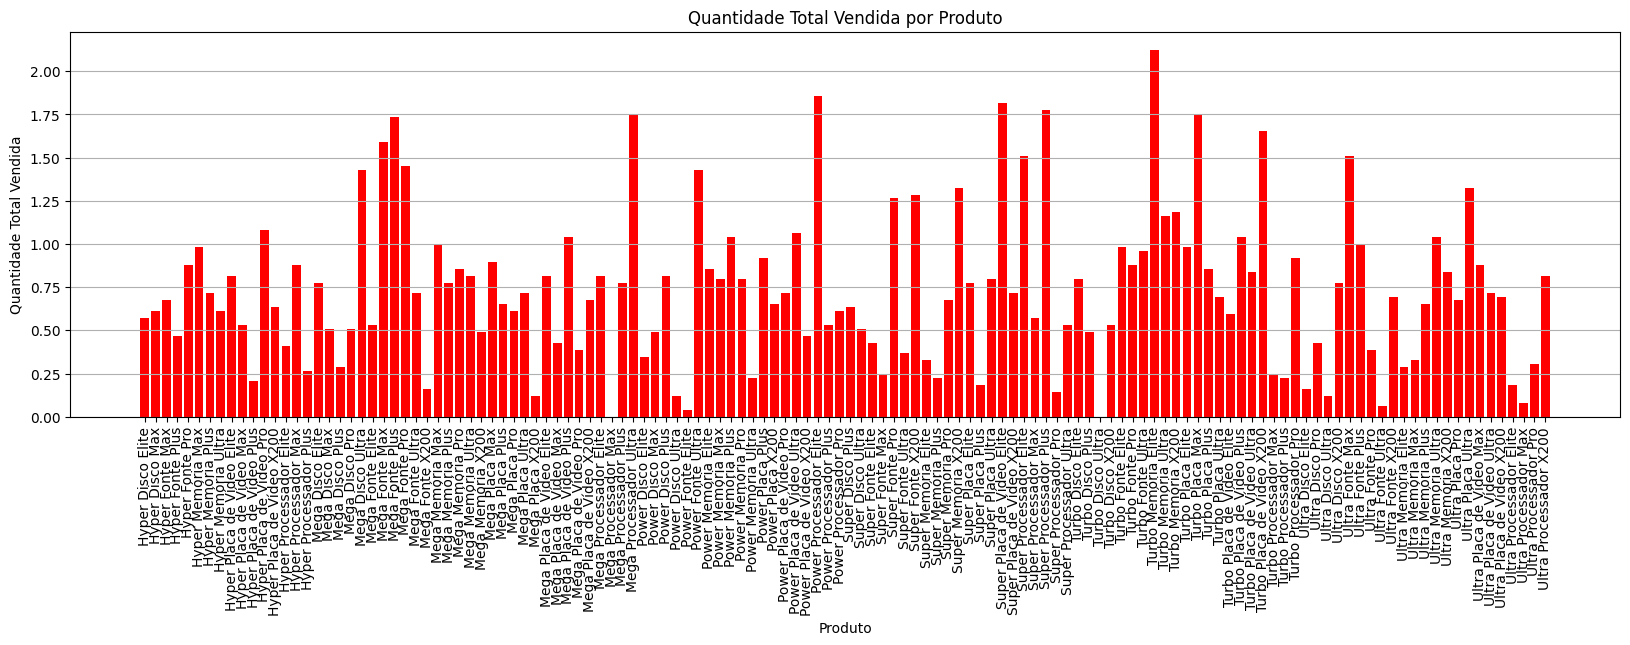

In [ ]:
import matplotlib.pyplot as plt

## Calcular o total vendido para cada linha
df_normalizado['total_vendido'] = df_normalizado['Quantidade'] * df_normalizado['Preço']

## Agrupar por produto e somar a quantidade total vendida
quantidade_total_por_produto = df_normalizado.groupby('Produto')['Quantidade'].sum()

## Criar o gráfico de barras
plt.figure(figsize=(20, 5))  # Define o tamanho da figura
## no plt.bat(POSICAO X, POSICAO y, COR)
plt.bar(quantidade_total_por_produto.index, quantidade_total_por_produto, color='red')
plt.title('Quantidade Total Vendida por Produto')
plt.xlabel('Produto')
plt.ylabel('Quantidade Total Vendida')
## Rotacionar os rótulos do eixo x se necessário
## usado para fins esteticos, uma vez que o datasets é extenso
plt.xticks(rotation=90)
## o grid serve para adicionar linhas de referencia no grafico, faciliatando a leitura
plt.grid(axis='y')
plt.show()

## K-Vizinhos Mais Próximos - Classificação

Usando a mesma base de dados, **crie uma coluna binária chamada Alta_Venda**, onde o *valor é 1 se a quantidade vendida for maior que a média e 0 caso contrário*. Em seguida, crie um modelo de classificação utilizando o **algoritmo K-Vizinhos Mais Próximos (KNN) para prever se uma venda será alta ou não**. *Avalie o modelo utilizando a matriz de confusão.* *texto em itálico*

In [ ]:
media_venda=df_normalizado['total_vendido'].mean()

print(f'Média de venda: {media_venda:.2f}')

df_normalizado['Alta_Venda']=df_normalizado.apply(lambda x:1 if x['total_vendido']>media_venda else 0, axis=1)

##Importar a bilbioteca que aplica o algoritmo de KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import math
import numpy as np


df_normalizado.head()

Média de venda: 498.59


,Data,Produto,Quantidade,Preço,total_vendido,Alta_Venda
2,2024-01-19 05:39:08,Hyper Placa de Vídeo Pro,0.122449,271.15,33.202041,0
3,2023-08-02 02:35:30,Power Fonte Ultra,0.489796,1075.75,526.897959,1
6,2023-02-19 05:33:03,Turbo Placa Plus,0.224490,1240.29,278.432449,0
7,2024-01-13 00:30:18,Super Fonte Pro,0.653061,1067.46,697.116735,1
9,2024-06-20 07:36:59,Mega Disco Ultra,0.693878,399.67,277.322041,0


In [ ]:
##Definição de caracteristicas
x=np.array(df_normalizado.drop(['Data', 'Produto', 'Quantidade', 'Alta_Venda'], axis=1))

##Definição do alvo
y=np.array(df_normalizado.Alta_Venda)

[[ 271.15         33.20204082]
 [1075.75        526.89795918]
 [1240.29        278.43244898]
 [1067.46        697.11673469]
 [ 399.67        277.32204082]]
[0 1 0 1 0]


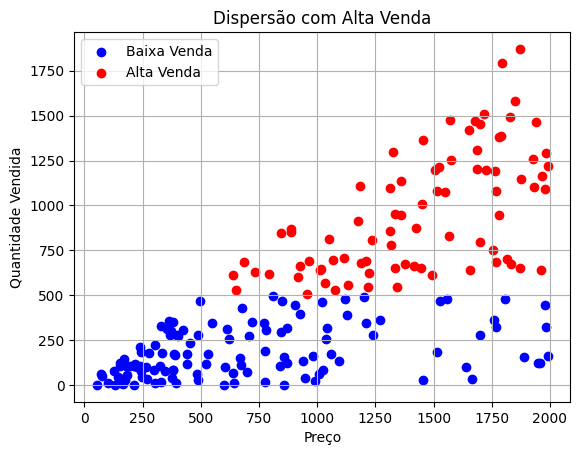

In [ ]:
print(x[:5])
print(y[:5])
# Criar o gráfico de dispersão
plt.scatter(x[y == 0, 0], x[y == 0, 1], color='blue', marker='o', label='Baixa Venda')  # Gráfico de dispersão para baixa venda
plt.scatter(x[y == 1, 0], x[y == 1, 1], color='red', marker='o', label='Alta Venda')  # Gráfico de dispersão para alta venda

plt.title('Dispersão com Alta Venda')
plt.xlabel('Preço')
plt.ylabel('Quantidade Vendida')
plt.legend()
plt.grid()
plt.show()

In [ ]:

'''
# Dividindo os dados em conjuntos de treinamento e test

1 - primeiro paramentro é um conjunto de dados de treinanado,
    podendo ser dois, um sendo as caracteristicas e
    outro sendo o alvo.
2 - O segundo ou terceiro representa o a quantidae de dados em %
    que serão usados para o treinamento.Exemplo: test_size=0.2
    significa que 20% dos dados serão usados para teste.
3 - train_size: A proporção do conjunto de dados a ser incluída
    no conjunto de treinamento. Pode ser um float, int ou None.
    Se não especificado, será complementado automaticamente
    com test_size.
4 - define o estado inicial do gerador de números aleatórios.
    Usado para garantir a reprodutibilidade dos resultados,
    Se especificado, permite que você obtenha a mesma divisão
    toda vez que executar o código.
5 - shuffle: Um booleano que indica se os dados devem ser
    embaralhados antes da divisão. O padrão é True. É uma
    boa prática embaralhar os dados para evitar qualquer
    tipo de viés na amostragem.
6 - stratify: Se não for None, os dados serão divididos de
    forma estratificada com base nessa variável. Por exemplo,
    se você passar a variável alvo (y), ele garantirá que as
    proporções de classes no conjunto de treinamento e teste
    sejam as mesmas que no conjunto original.
'''
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

# Importando e instanciando o classificador KNN
knn = (KNeighborsClassifier(max(1, int(math.log(df_normalizado.shape[0])))))

# Treinando o modelo
knn.fit(X_train, y_train)

# Fazendo previsões
y_pred = knn.predict(X_test)

# Avaliando o modelo
conf_matrix = confusion_matrix(y_test, y_pred)
#avalaiando a precisão do sistema atravs da acuraça
accuracy = accuracy_score(y_test, y_pred)
'''

Matriz de confusão [Verdadeiros Positivos, Falsos Negativos,
                    Falsos Positivos, Verdadeiros Negativos]
pv=número de vezes que o modelo previu positivo e o rótulo real também era positivo.
fn=número de vezes que o modelo previu negativo, mas o rótulo real era positivo.
fp=número de vezes que o modelo previu positivo, mas o rótulo real era negativo.
vn=número de vezes que o modelo previu negativo e o rótulo real também era negativo.
'''

print(f'Matriz de Confusão:\n{conf_matrix}')
print(f'Acuracia:{accuracy*100:.2f}%')


Matriz de Confusão:
[[22  2]
 [ 0 17]]
Acuracia:95.12%


In [ ]:

#print(knn.predict())

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        24
           1       0.89      1.00      0.94        17

    accuracy                           0.95        41
   macro avg       0.95      0.96      0.95        41
weighted avg       0.96      0.95      0.95        41



## Agrupamento - K-means
Utilize o **algoritmo K-means** para *agrupar os produtos com base em suas quantidades vendidas e preços*. **Determine o número ideal de clusters utilizando o método do cotovelo** (elbow method).

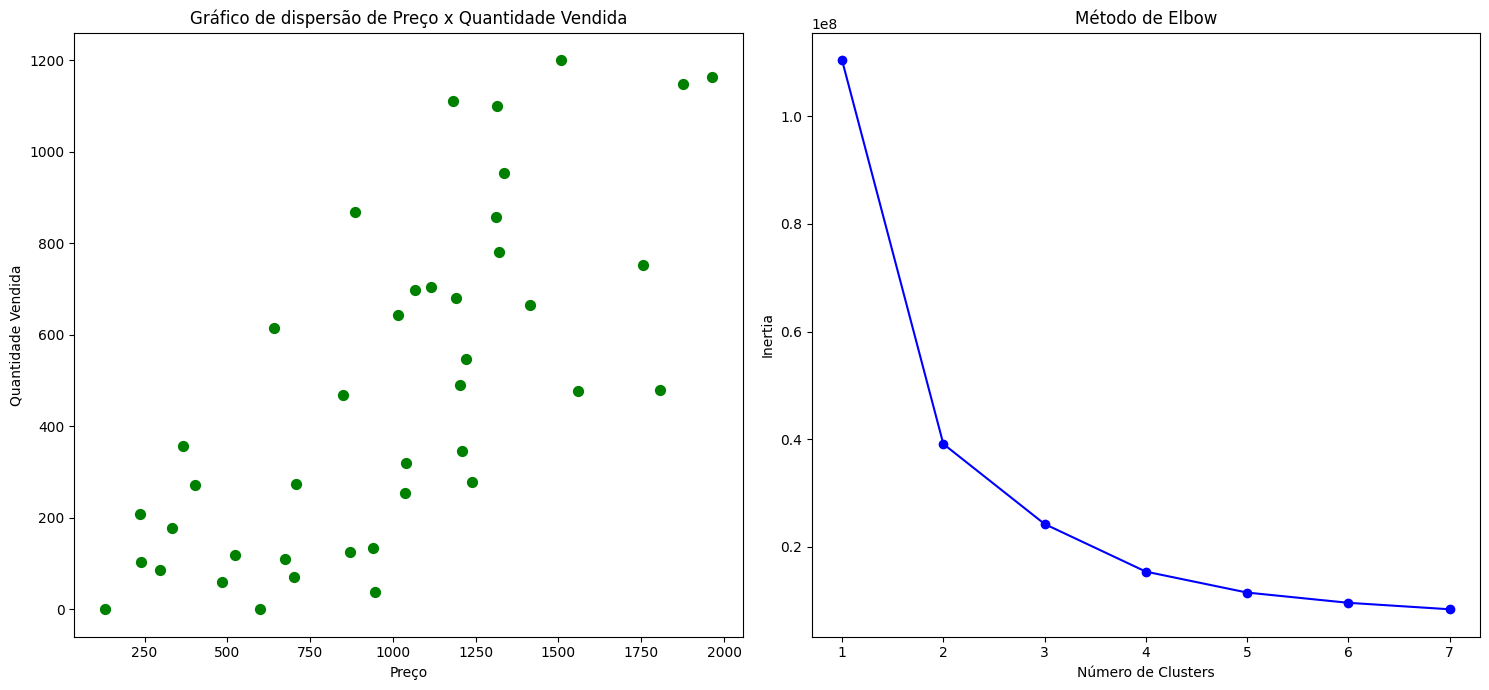

In [ ]:
## K-means ou k media é um algoritmo de predição que faz uso de uma subdivisão de um conjunto de dados 2d em k grupos (clusters) prevendo a qual grupo um novo elemente pertence. Muito util para classificação de dados que não possuem um rótulo.

# A questão pede para agrupar produtos (clusters) com base em suas quantidades vendidasd e preco (plano)

from sklearn.cluster import KMeans

#quantidade vendidas e preço é o nosso x
#Para definir o numero ideial de clusters, vamos fazer
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.scatter(X_test[:,0], X_test[:,1], c='green', s=50)
plt.xlabel('Preço')
plt.ylabel('Quantidade Vendida')
plt.title('Gráfico de dispersão de Preço x Quantidade Vendida')

##Criando o grafico de Elbow
# Descobrindo a inercia e as quantidades de K

inertia=[]
K=range(1,8)
for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

plt.subplot(1,2,2)
plt.plot(K, inertia,'o-', color='blue')
plt.title("Método de Elbow")
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')

plt.tight_layout()
plt.show()

**É perceptível que a quantidade de clusters ideal é tres (3), pois a partir desse ponto a inércia começa a diminuir de forma mais lenta.**

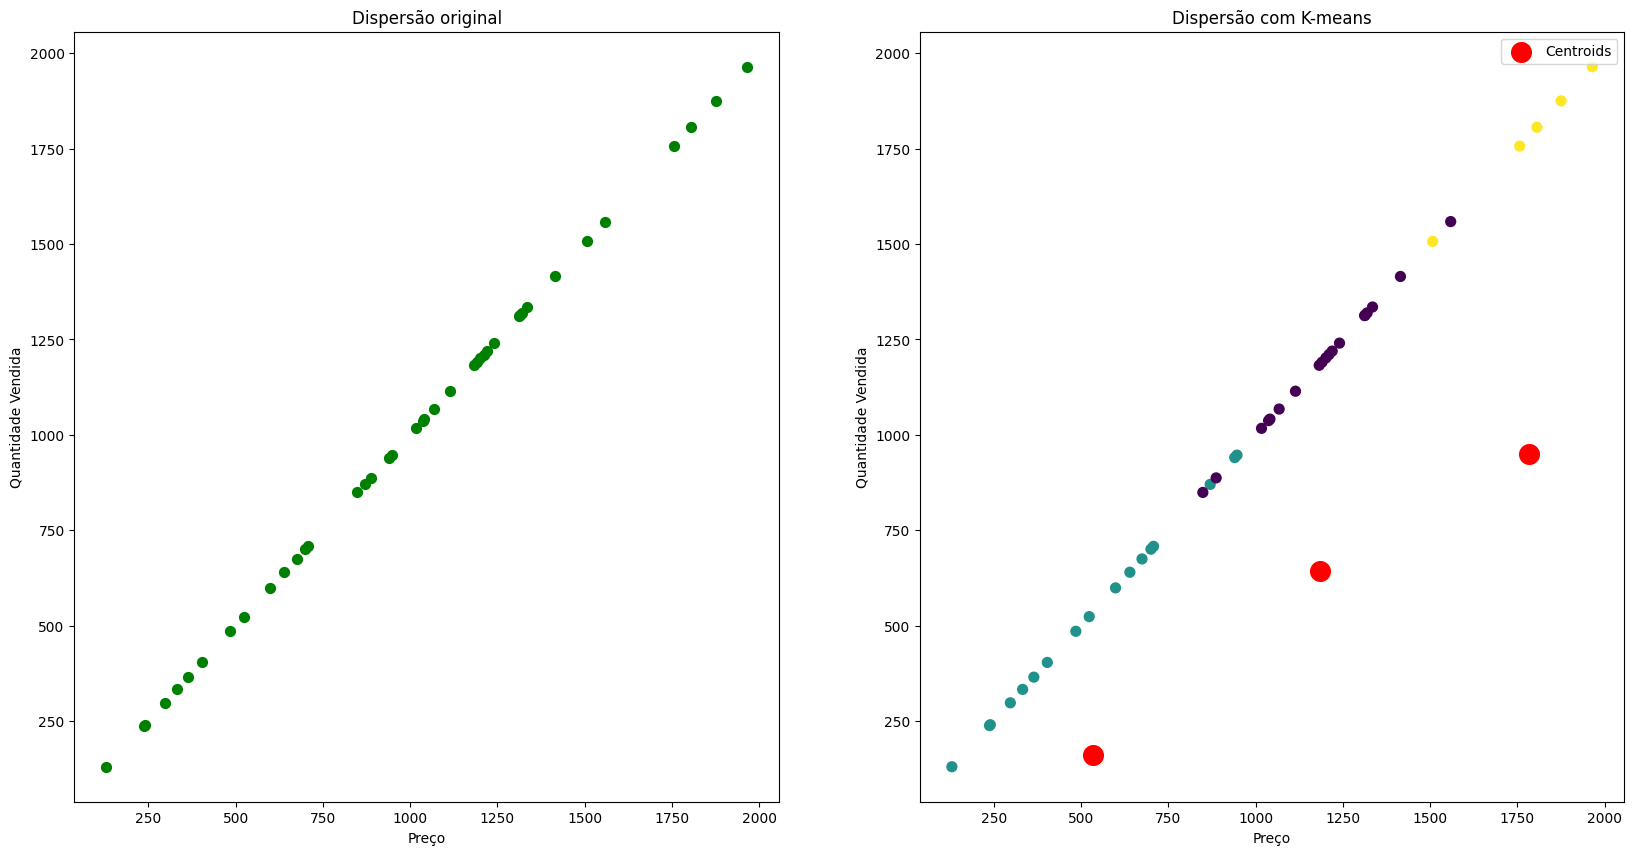

In [ ]:
k=3
kmeans=KMeans(n_clusters=k, random_state=2)
#X_train, X_test, y_train, y_test
kmeans.fit(X_train)
y_km=kmeans.fit_predict(X_test)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("Dispersão original")
plt.scatter(X_test[:,0], X_test[:,0], c='green', s=50)
plt.xlabel('Preço')
plt.ylabel('Quantidade Vendida')

plt.subplot(1,2,2)
plt.title("Dispersão com K-means")
plt.scatter(X_test[:,0], X_test[:,0], c=y_km, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='red', label='Centroids')
plt.xlabel('Preço')
plt.ylabel('Quantidade Vendida')

plt.legend()

plt.show()

## Discusão de grupamento de clusters

Descreva as **características de cada cluster encontrado** no exercício anterior. **Identifique quais produtos estão em cada cluster** e *discuta possíveis razões para esses agrupamentos.*


In [ ]:
## cria uma lista com os produtos
produtos=np.array(df_normalizado.Produto)

print(produtos[:5])

##Cria um dicionario com os clusters como chaves e uma lista vazia como valor
produtos_clusters={i: [] for i in range(k)}

produtos_clusters


['Hyper Placa de Vídeo Pro' 'Power Fonte Ultra' 'Turbo Placa Plus'
 'Super Fonte Pro' 'Mega Disco Ultra']


{0: [], 1: [], 2: []}

In [ ]:
# Fazer um for para adicionar os produtos ao cluster correspondente
for i, cluster in enumerate(y_km):
    produtos_clusters[cluster].append(produtos[i])

for cluster_id, produtos in produtos_clusters.items():
    print(f'Cluster{cluster_id}: {produtos}\n')

Cluster0: ['Hyper Placa de Vídeo Pro', 'Power Fonte Ultra', 'Mega Fonte Ultra', 'Power Placa de Vídeo Ultra', 'Hyper Placa de Vídeo Elite', 'Super Processador Ultra', 'Mega Memória Ultra', 'Turbo Memória Elite', 'Ultra Fonte Max', 'Hyper Memória Max', 'Power Memória Plus', 'Turbo Placa Ultra', 'Turbo Memória X200', 'Mega Processador Plus', 'Ultra Fonte Max', 'Mega Placa de Vídeo Elite', 'Mega Placa Max', 'Power Processador Pro', 'Super Memória X200']

Cluster1: ['Turbo Placa Plus', 'Super Fonte Pro', 'Mega Disco Ultra', 'Ultra Memória Ultra', 'Hyper Placa de Vídeo Plus', 'Mega Fonte Plus', 'Mega Placa de Vídeo X200', 'Hyper Processador Plus', 'Ultra Fonte X200', 'Ultra Disco Pro', 'Super Placa Plus', 'Mega Disco Pro', 'Hyper Disco Elite', 'Turbo Disco Plus', 'Super Fonte Elite', 'Turbo Memória Elite', 'Ultra Memória Max']

Cluster2: ['Power Disco Elite', 'Power Placa de Vídeo X200', 'Turbo Processador Max', 'Super Processador Elite', 'Super Processador Pro']



Sabendo quais produtos estão em cafa cluster, podemos identificar quais produtos são mais vendidos (e que tem preço mais elevado) e quais são menos vendidos(que também são mais baratos). Isso pode ser útil para a empresa, pois ela pode focar em estratégias de marketing para os produtos menos vendidos, a fim de aumentar suas vendas. Além disso, a empresa pode identificar quais produtos são mais populares entre os clientes e, assim, investir mais recursos nesses produtos para maximizar seus lucros.

## Visualização de Clusters
Crie uma **visualização que mostre os clusters** formados pelo algoritmo K-means. *Utilize um gráfico de dispersão*, onde *cada ponto representa um produto*, e *cores diferentes representam os diferentes clusters*.

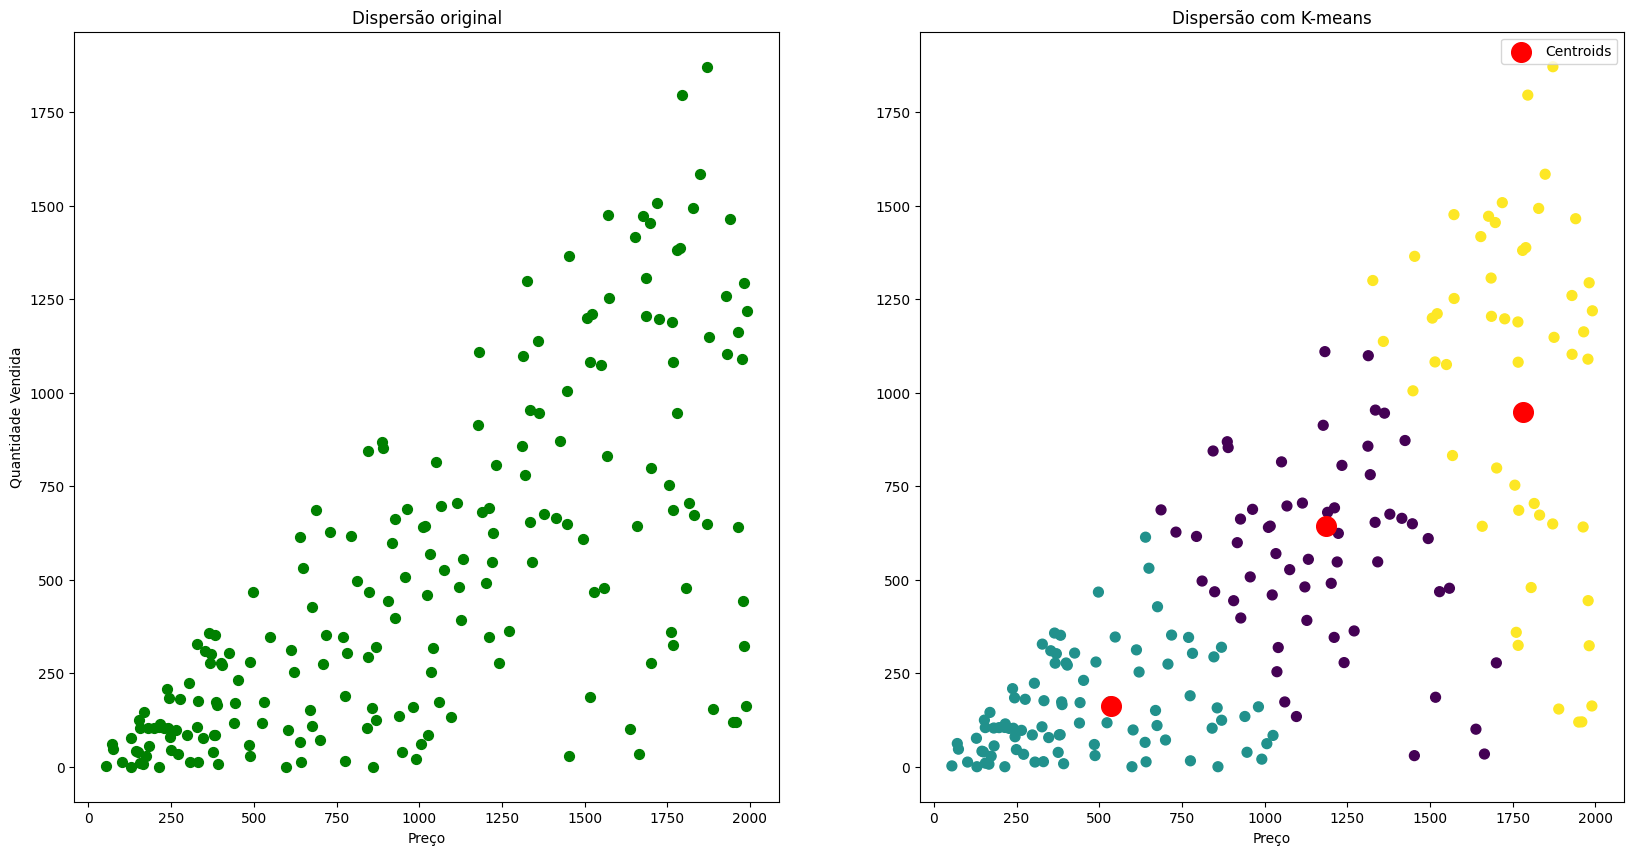

In [ ]:
yMeans = kmeans.predict(x)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("Dispersão original")
plt.scatter(x[:,0], x[:,1], c='green', s=50)
plt.xlabel('Preço')
plt.ylabel('Quantidade Vendida')

plt.subplot(1,2,2)
plt.title("Dispersão com K-means")
plt.scatter(x[:,0], x[:,1], c=yMeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='red', label='Centroids')
plt.xlabel('Preço')
plt.legend()

plt.show()

## Validação Cruzada
Realize uma **validação cruzada de 5 vezes** para o modelo KNN criado no exercício 5(K-Vizinhos Mais Próximos - Classificação). *Compare os resultados obtidos e discuta a estabilidade do modelo.*

In [ ]:
from sklearn.model_selection import cross_val_score

#treinamento fracionado
treinamento_fracionado=cross_val_score(knn, x, y, cv=5, scoring='accuracy')

acuracia_media=treinamento_fracionado.mean()
diferenca_acuracia=acuracia_media*100-accuracy*100
print(f'Acurácia do modelo: {acuracia_media*100:.2f}%\nCom diferença de {diferenca_acuracia:.2f}% em relação ao modelo de teste sem validação cruzada.\n'
      f'{"O que pode nos certificar uma precisão maior em relação a dados aleatórios." if diferenca_acuracia > 0 else "O que pode nos certificar uma precisão menor em relação a dados aleatórios."}')

## Tomada de Decisão baseada em Clustering

Com base nos clusters identificados, escreva um script que sugira estratégias de marketing. Por exemplo, para cada cluster, decida se é melhor aumentar ou diminuir o preço dos produtos, lançar promoções ou focar em marketing específico.

In [ ]:
# Função para sugerir estratégias de marketing baseada no cluster

df_normalizado['Cluster'] = kmeans.predict(x)

print(df_normalizado.head())
def sugerir_estrategia(cluster_id, produtos):
    print(f'\nCluster {cluster_id}:\nProdutos: {produtos}\nSugestões de Marketing:')

    if len(produtos) > 10:
        print("Estratégia: Considerar campanhas em larga escala, dada a alta concentração de produtos.")
    else:
        print("Estratégia: Focar em marketing de nicho ou personalizações para clientes específicos.")


for cluster_id, produtos in produtos_clusters.items():
    sugerir_estrategia(cluster_id, produtos)

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind, wilcoxon, f_oneway

# Suponha que você tenha dois DataFrames: vendas_antes e vendas_depois
# Cada DataFrame deve conter as vendas para cada produto, organizadas por clusters.
vendas_antes_df = df_normalizado
vendas_depois_df = df_normalizado
# Exemplo de comparação usando o teste t de Student
resultados_ttest = []
for cluster_id in produtos_clusters.keys():
    vendas_antes = vendas_antes_df[vendas_antes_df['Cluster'] == cluster_id]['total_vendido']
    vendas_depois = vendas_depois_df[vendas_depois_df['Cluster'] == cluster_id]['total_vendido']
    t_stat, p_val = ttest_ind(vendas_antes, vendas_depois)
    resultados_ttest.append((cluster_id, t_stat, p_val))

# Exemplo de comparação usando o teste de Wilcoxon
resultados_wilcoxon = []
for cluster_id in produtos_clusters.keys():
    vendas_antes = vendas_antes_df[vendas_antes_df['Cluster'] == cluster_id]['total_vendido']
    vendas_depois = vendas_depois_df[vendas_depois_df['Cluster'] == cluster_id]['total_vendido']
    w_stat, p_val = wilcoxon(vendas_antes, vendas_depois)
    resultados_wilcoxon.append((cluster_id, w_stat, p_val))

# Exemplo de ANOVA
resultados_anova = f_oneway(
    vendas_antes_df['total_vendido'],
    vendas_depois_df['total_vendido']
)

Gere um relatório resumindo os resultados da análise estatística e discuta se as estratégias de marketing sugeridas foram eficazes.

In [ ]:
def gerar_relatorio(resultados_ttest, resultados_wilcoxon, resultados_anova):
    with open('relatorio_marketing.txt', 'w') as f:
        f.write('### Relatório de Análise Estatística ###\n\n')

        f.write('## Resultados do Teste t de Student ##\n')
        for cluster_id, t_stat, p_val in resultados_ttest:
            f.write(f'Cluster {cluster_id}: t-statística = {t_stat:.4f}, p-valor = {p_val:.4f}\n')
            if p_val < 0.05:
                f.write('Impacto significativo detectado.\n')
            else:
                f.write('Nenhum impacto significativo detectado.\n')

        f.write('\n## Resultados do Teste de Wilcoxon ##\n')
        for cluster_id, w_stat, p_val in resultados_wilcoxon:
            f.write(f'Cluster {cluster_id}: Wilcoxon-statística = {w_stat:.4f}, p-valor = {p_val:.4f}\n')
            if p_val < 0.05:
                f.write('Impacto significativo detectado.\n')
            else:
                f.write('Nenhum impacto significativo detectado.\n')

        f.write('\n## Resultados da ANOVA ##\n')
        f.write(f'F-statística = {resultados_anova.statistic:.4f}, p-valor = {resultados_anova.pvalue:.4f}\n')
        if resultados_anova.pvalue < 0.05:
            f.write('Diferenças significativas detectadas entre os grupos.\n')
        else:
            f.write('Nenhuma diferença significativa detectada entre os grupos.\n')

        f.write('\n## Discussão ##\n')
        f.write('Aqui você pode discutir a eficácia das estratégias com base nos resultados dos testes.\n')

# Chamada da função para gerar o relatório
gerar_relatorio(resultados_ttest, resultados_wilcoxon, resultados_anova)